In [2]:
import numpy as np
import matplotlib.pyplot as plt

In the next portion all the algorithms are implemented as asked in part (b) of the question.

In [3]:
##### Defining the parameters ########
K = 10
N = 1000
M = 10

In [4]:
###### The means of the gaussian rewards are defined here #####
mu = np.arange(K)*1.0
mu = (mu-5)
np.random.shuffle(mu)
print("The means of the gaussians of the rewards are")
print(mu)

The means of the gaussians of the rewards are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In [5]:
##### function to take greedy action #####
def greedy(x):
    return np.argmax(x)

In [6]:
##### function to take epsilon greedy action #####
def eps_greedy(x,eps):
    ch = np.random.choice([0,1],p = [eps,1-eps])
    if(ch==0):
        return np.random.randint(K)
    else:
        return np.argmax(x)

In [7]:
##### function to take action according to upper confidence bound #####
def UCB(x,N,t):
    temp = np.sqrt((2*np.log(t+1))/(N+1e-10))
    return np.argmax(x+temp)

In [8]:
############ Greedy Algorithm implementation ###########

In [9]:
Q1 = np.zeros(K)
num1 = np.zeros(K)
### Eploration ###
for m in range(M):
    for k in range(K):
        reward = np.random.normal(mu[k],1)
        num1[k]+=1
        Q1[k] = Q1[k] + (1/num1[k])*(reward - Q1[k])
### Greedy Exploitation ###
for m in range(M+1,N):
    ind = greedy(Q1)
    num1[ind]+=1
    reward = np.random.normal(mu[ind],1)
    Q1[ind] = Q1[ind] + (1/num1[ind])*(reward - Q1[ind])
print("The Q values calculated are")
print(Q1)
print("The means of the rewards of the Gaussian are")
print(mu)

The Q values calculated are
[ 3.61226195  0.02088166 -0.96335541 -4.25783532  3.9395563  -4.90749382
 -2.2338106   2.09833142  1.19006889 -3.57508667]
The means of the rewards of the Gaussian are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In [10]:
############ Epsilon Greedy algorithm with epsilon = 0.1 ##############

In [11]:
Q2 = np.zeros(K)
num2 = np.zeros(K)
### Exploration ###
for m in range(M):
    for k in range(K):
        reward = np.random.normal(mu[k],1)
        num2[k]+=1
        Q2[k] = Q2[k] + (1/num2[k])*(reward - Q2[k])
### Epsilon greedy Exploitation ###
for m in range(M+1,N):
    ind = eps_greedy(Q2,0.1)
    num2[ind]+=1
    reward = np.random.normal(mu[ind],1)
    Q2[ind] = Q2[ind] + (1/num2[ind])*(reward - Q2[ind])
print("The Q values calculated are")
print(Q2)
print("The means of the rewards of the Gaussian are")
print(mu)

The Q values calculated are
[ 2.82735653 -0.07038963 -1.23791537 -3.69546159  4.03582164 -4.99076375
 -2.007111    1.65257366  1.21644835 -2.33750054]
The means of the rewards of the Gaussian are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In [12]:
############## Epsilon Greedy algorithm with epsilon = 0.01 ###############

In [13]:
Q3 = np.zeros(K)
num3 = np.zeros(K)
### Exploration ###
for m in range(M):
    for k in range(K):
        reward = np.random.normal(mu[k],1)
        num3[k]+=1
        Q3[k] = Q3[k] + (1/num3[k])*(reward - Q3[k])
### Epsilon greedy Exploitation ###
for m in range(M+1,N):
    ind = eps_greedy(Q3,0.001)
    num3[ind]+=1
    reward = np.random.normal(mu[ind],1)
    Q3[ind] = Q3[ind] + (1/num3[ind])*(reward - Q3[ind])
print("The Q values calculated are")
print(Q3)
print("The means of the rewards of the Gaussian are")
print(mu)

The Q values calculated are
[ 3.13032487  0.47380571 -1.09234553 -4.18245165  4.07508104 -4.97985159
 -1.59292238  1.56953577  1.15625698 -3.12902445]
The means of the rewards of the Gaussian are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In [14]:
############### Epsilon Greedy with decay ##############

In [15]:
Q4 = np.zeros(K)
num4 = np.zeros(K)
### Exploration ###
for m in range(M):
    for k in range(K):
        reward = np.random.normal(mu[k],1)
        num4[k]+=1
        Q4[k] = Q4[k] + (1/num4[k])*(reward - Q4[k])
r = 0.99   ### decay factor
eps = 0.1  ### initial value of epsilon
### Exploitation with epsilon greedy with decay ###
for m in range(M+1,N):
    ind = eps_greedy(Q4,eps)
    eps = eps*0.99
    num4[ind]+=1
    reward = np.random.normal(mu[ind],1)
    Q4[ind] = Q4[ind] + (1/num4[ind])*(reward - Q4[ind])
print("The Q values calculated are")
print(Q4)
print("The means of the rewards of the Gaussian are")
print(mu)

The Q values calculated are
[ 3.06604524 -0.33610897 -0.95665221 -4.03514246  3.95986384 -5.46893074
 -1.74538026  2.41207108  0.96314548 -3.23531538]
The means of the rewards of the Gaussian are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In [16]:
########### UCB algorithm ###################

In [17]:
Q5 = np.zeros(K)
num5 = np.zeros(K)
### Exploration ###
for m in range(M):
    for k in range(K):
        reward = np.random.normal(mu[k],1)
        num5[k]+=1
        Q5[k] = Q5[k] + (1/num5[k])*(reward - Q5[k])
### UCB exploitation ###
for m in range(M+1,N):
    ind = UCB(Q5,num5,m)
    num5[ind]+=1
    reward = np.random.normal(mu[ind],1)
    Q5[ind] = Q5[ind] + (1/num5[ind])*(reward - Q5[ind])
print("The Q values calculated are")
print(Q5)
print("The means of the rewards of the Gaussian are")
print(mu)

The Q values calculated are
[ 3.12572438 -0.3840261  -1.6718125  -3.58580474  4.05771716 -5.11379805
 -1.90385883  2.073404    1.21796885 -3.113012  ]
The means of the rewards of the Gaussian are
[ 3.  0. -1. -4.  4. -5. -2.  2.  1. -3.]


In the next part, the graphs are plotted as asked in part (c) of the question. The variables of this part are independent from the previous part,i.e., all the algorithms are reimplemented for part (c) of the question.

In [18]:
### function used in computing V*
def find_v():
    res = []
    for i in range(K):
        res.append(np.random.normal(mu[i],1))
    return max(res)

In [19]:
####### Plotting graphs as asked in the question #########

In [20]:
### defining the parameters and variables 
N = 1000
T = 500  
r = 0.99
R1 = np.zeros([T,N])
R2 = np.zeros([T,N])
R3 = np.zeros([T,N])
R4 = np.zeros([T,N])
R5 = np.zeros([T,N])
rew1 = np.zeros([T,N])
rew2 = np.zeros([T,N])
rew3 = np.zeros([T,N])
rew4 = np.zeros([T,N])
rew5 = np.zeros([T,N])
V = np.zeros([T,N])
N1 = np.zeros([T,K])
N2 = np.zeros([T,K])
N3 = np.zeros([T,K])
N4 = np.zeros([T,K])
N5 = np.zeros([T,K])
n1 = np.zeros([T,N])
n2 = np.zeros([T,N])
n3 = np.zeros([T,N])
n4 = np.zeros([T,N])
n5 = np.zeros([T,N])
for t in range(T):
    print(t,"of",T,"done")
    q1 = np.zeros(K)
    q2 = np.zeros(K)
    q3 = np.zeros(K)
    q4 = np.zeros(K)
    q5 = np.zeros(K)
    eps = 0.1
    for n in range(1,N):
        V[t,n] = find_v()
        
        ind = greedy(q1)   #### greedy algorithm
        N1[t][ind]+=1
        n1[t][n] = N1[t][ind]
        reward = np.random.normal(mu[ind],1)
        q1[ind] = q1[ind] + (1/N1[t][ind])*(reward - q1[ind])
        R1[t,n] = R1[t,n-1] + (1/(n))*(reward - R1[t,n-1])
        rew1[t,n] = reward
        
        ind = eps_greedy(q2,0.1) #### epsilon greedy with epsilon = 0.1
        N2[t][ind]+=1
        n2[t][n] = N2[t][ind]
        reward = np.random.normal(mu[ind],1)
        q2[ind] = q2[ind] + (1/N2[t][ind])*(reward - q2[ind])
        R2[t,n] = R2[t,n-1] + (1/(n))*(reward - R2[t,n-1])
        rew2[t,n] = reward
        
        ind = eps_greedy(q3,0.01)  #### epsilon greedy with epsilon = 0.01
        N3[t][ind]+=1
        n3[t][n] = N3[t][ind]
        reward = np.random.normal(mu[ind],1)
        q3[ind] = q3[ind] + (1/N3[t][ind])*(reward - q3[ind])
        R3[t,n] = R3[t,n-1] + (1/(n))*(reward - R3[t,n-1])
        rew3[t,n] = reward
        
        ind = eps_greedy(q4,eps)  #### epsilon greedy with decay
        eps = eps*0.99
        N4[t][ind]+=1
        n4[t][n] = N4[t][ind]
        reward = np.random.normal(mu[ind],1)
        q4[ind] = q4[ind] + (1/N4[t][ind])*(reward - q4[ind])
        R4[t,n] = R4[t,n-1] + (1/(n))*(reward - R4[t,n-1])
        rew4[t,n] = reward
        
        ind = UCB(q5,N5[t],t)  ### uppper confidence bound algo
        N5[t][ind]+=1
        n5[t][n] = N5[t][ind]
        reward = np.random.normal(mu[ind],1)
        q5[ind] = q5[ind] + (1/N5[t][ind])*(reward - q5[ind])
        R5[t,n] = R5[t,n-1] + (1/(n))*(reward - R5[t,n-1])
        rew5[t,n] = reward
        
#### taking mean over the number of times
r1 = np.mean(R1,axis=0)
r2 = np.mean(R2,axis=0)
r3 = np.mean(R3,axis=0)
r4 = np.mean(R4,axis=0)
r5 = np.mean(R5,axis=0)
rr1 = np.mean(rew1,axis=0)
rr2 = np.mean(rew2,axis=0)
rr3 = np.mean(rew3,axis=0)
rr4 = np.mean(rew4,axis=0)
rr5 = np.mean(rew5,axis=0)
v = np.mean(V,axis=0)

0 of 500 done
1 of 500 done
2 of 500 done
3 of 500 done
4 of 500 done
5 of 500 done
6 of 500 done
7 of 500 done
8 of 500 done
9 of 500 done
10 of 500 done
11 of 500 done
12 of 500 done
13 of 500 done
14 of 500 done
15 of 500 done
16 of 500 done
17 of 500 done
18 of 500 done
19 of 500 done
20 of 500 done
21 of 500 done
22 of 500 done
23 of 500 done
24 of 500 done
25 of 500 done
26 of 500 done
27 of 500 done
28 of 500 done
29 of 500 done
30 of 500 done
31 of 500 done
32 of 500 done
33 of 500 done
34 of 500 done
35 of 500 done
36 of 500 done
37 of 500 done
38 of 500 done
39 of 500 done
40 of 500 done
41 of 500 done
42 of 500 done
43 of 500 done
44 of 500 done
45 of 500 done
46 of 500 done
47 of 500 done
48 of 500 done
49 of 500 done
50 of 500 done
51 of 500 done
52 of 500 done
53 of 500 done
54 of 500 done
55 of 500 done
56 of 500 done
57 of 500 done
58 of 500 done
59 of 500 done
60 of 500 done
61 of 500 done
62 of 500 done
63 of 500 done
64 of 500 done
65 of 500 done
66 of 500 done
67 of

In [21]:
### function usefull while plotting histogram
def conv(x):
    res = []
    for i in range(0,x.shape[0]):
        for j in range(0,int(x[i])):
            res.append(i+1)
    return np.array(res)

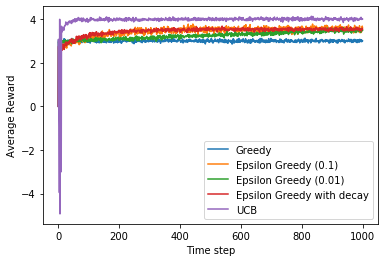

In [22]:
##### plotting the average reward per time step for different algorithms ####
plt.plot(rr1, label = "Greedy")
plt.plot(rr2, label = "Epsilon Greedy (0.1)")
plt.plot(rr3, label = "Epsilon Greedy (0.01)")
plt.plot(rr4, label = "Epsilon Greedy with decay")
plt.plot(rr5, label = "UCB")
plt.xlabel('Time step')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

In the next part, the histograms are plotted as asked in part (d) of the question.

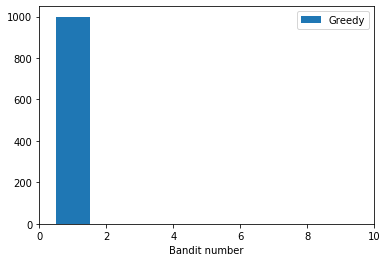

In [23]:
#### Greedy algorithm ####
a1 = np.mean(N1,axis=0)
a1 = conv(a1)
plt.hist(a1,bins = 'auto',label="Greedy")
plt.xlim(0,10)
plt.xlabel("Bandit number")
plt.legend()
plt.show()

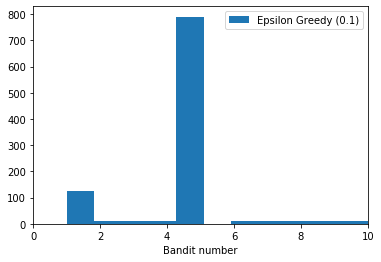

In [24]:
#### epsilon greedy with epsilon = 0.1 ####
a2 = np.mean(N2,axis=0)
a2 = conv(a2)
plt.hist(a2,bins = 'auto',label="Epsilon Greedy (0.1)")
plt.xlim(0,10)
plt.xlabel("Bandit number")
plt.legend()
plt.show()

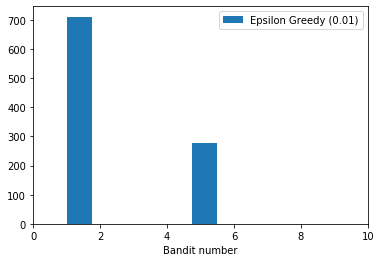

In [25]:
#### epsilon greedy with epsilon = 0.01 ####
a3 = np.mean(N3,axis=0)
a3 = conv(a3)
plt.hist(a3,bins = 'auto',label="Epsilon Greedy (0.01)")
plt.xlim(0,10)
plt.xlabel("Bandit number")
plt.legend()
plt.show()

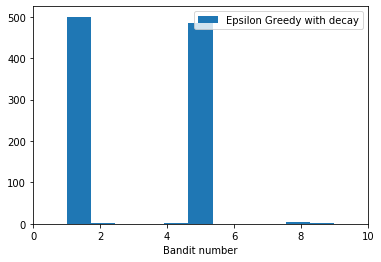

In [26]:
#### epsilon greedy with decay ####
a4 = np.mean(N4,axis=0)
a4 = conv(a4)
plt.hist(a4,bins = 'auto',label="Epsilon Greedy with decay")
plt.xlim(0,10)
plt.xlabel("Bandit number")
plt.legend()
plt.show()

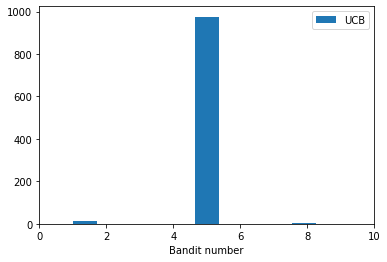

In [27]:
#### UCB ####
a5 = np.mean(N5,axis=0)
a5 = conv(a5)
plt.hist(a5,bins = 'auto',label="UCB")
plt.xlim(0,10)
plt.xlabel("Bandit number")
plt.legend()
plt.show()

In the next part, the regrets as a function of time step are plotted for the different algorithms. First, all the individual graphs as plotted and then a single graph comparing all the regrets for different algorithms is plotted.

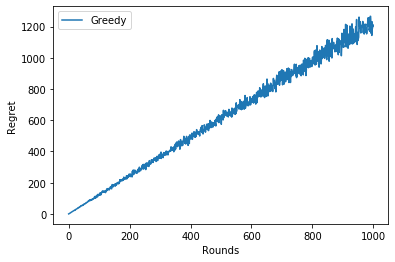

In [28]:
#### plotting regret for greedy algorithm ####
regret1 = np.mean(n1,axis=0)*(v-r1)
plt.plot(regret1,label='Greedy')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

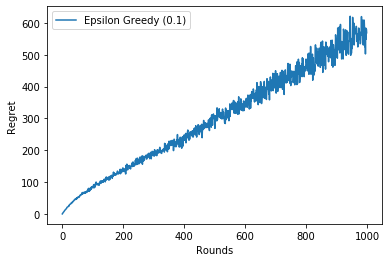

In [29]:
#### plotting regret for epsilon greedy algorithm with epsilon = 0.1####
regret2 = np.mean(n2,axis=0)*(v-r2)
plt.plot(regret2,label='Epsilon Greedy (0.1)')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

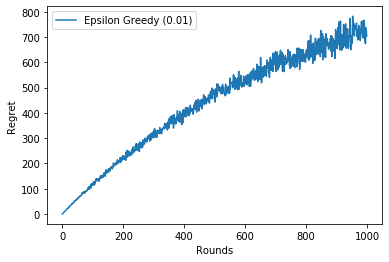

In [30]:
#### plotting regret for epsilon greedy algorithm with epsilon = 0.01####
regret3 = np.mean(n3,axis=0)*(v-r3)
plt.plot(regret3,label='Epsilon Greedy (0.01)')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

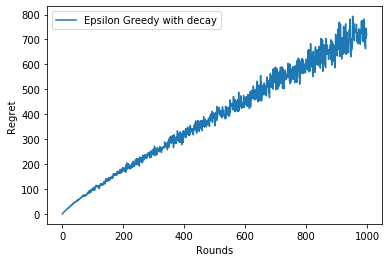

In [31]:
#### plotting regret for greedy with decay algorithm ####
regret4 = np.mean(n4,axis=0)*(v-r4)
plt.plot(regret4,label='Epsilon Greedy with decay')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

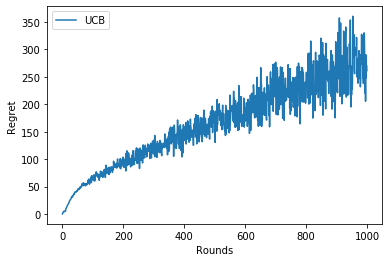

In [32]:
#### plotting regret for UCB algorithm ####
regret5 = np.mean(n5,axis=0)*(v-r5)
plt.plot(regret5,label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

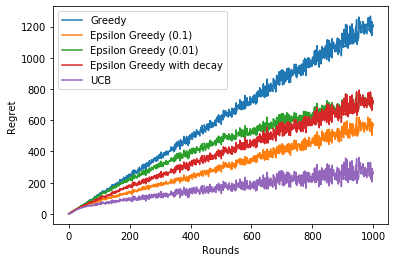

In [33]:
#### plotting a combined graph for all the regrets ####
plt.plot(regret1,label='Greedy')
plt.plot(regret2,label='Epsilon Greedy (0.1)')
plt.plot(regret3,label='Epsilon Greedy (0.01)')
plt.plot(regret4,label='Epsilon Greedy with decay')
plt.plot(regret5,label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Regret')
plt.legend()
plt.show()

Solution to part (f):

From the observations of the plots of the previous questions, we can easily see that UCB (upper condition bound) algorithm gives the best result. This is because in this algorithm, we pick the arm for which we are the most unsure. Therefore, very soon, the algorithm explores all the options available and learns to select the right arm.
We can see that greedy algorithm works the worst as there is very less chance of exploration. Epsilon greedy algorithm works better than this and epsilon greedy with decay algorithm works better than epsilon greedy algorithm.

Solution to part (g):

When we take the mean value of reward of the best and second best arm to be very close, some algorithms such as epsilon greedy with epsilon = 0.01 is not able to clearly distinguish between the best and second best arm. Just like the previous cases, greedy algorithm is not able to find the best action here, as well. However, UCB seems to work comparitively better than the other algorithms. It is also worth mentioning that in this case, the second best arm is picked many times by all the algorithms.